# Using Pre-trained Word Embeddings

In this notebook we will show some operations on pre-trained word embeddings to get familiar on how to use them. For that, We will use the [Gensim](https://radimrehurek.com/gensim/) library. I allows to load and use several pre-trained models for *Word2vec*, *Glove* and *Fasttext*


### Load a model

In [ ]:
import gensim.downloader as api

# api.info() returns a dict with info about available models/datasets
available_models = api.info()
# print the list of available models
print("Models: ", list(available_models['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [5]:
# prints the info about a specific model
print(available_models['models']['glove-wiki-gigaword-300'])

{'num_records': 400000, 'file_size': 394362229, 'base_dataset': 'Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)', 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/glove-wiki-gigaword-300/__init__.py', 'license': 'http://opendatacommons.org/licenses/pddl/', 'parameters': {'dimension': 300}, 'description': 'Pre-trained vectors based on Wikipedia 2014 + Gigaword, 5.6B tokens, 400K vocab, uncased (https://nlp.stanford.edu/projects/glove/).', 'preprocessing': 'Converted to w2v format with `python -m gensim.scripts.glove2word2vec -i <fname> -o glove-wiki-gigaword-300.txt`.', 'read_more': ['https://nlp.stanford.edu/projects/glove/', 'https://nlp.stanford.edu/pubs/glove.pdf'], 'checksum': '29e9329ac2241937d55b852e8284e89b', 'file_name': 'glove-wiki-gigaword-300.gz', 'parts': 1}


In [6]:
# Load the pre-trained "glove-wiki-gigaword-300" embeddings
glove_model = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [7]:
import gensim
from nltk.data import find

# As an alternative, you can also load the embeddings from a local file in word2vec format
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
w2v_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample)

### Word similarity

One attribute of word embeddings that makes them useful is the ability to compare them using cosine similarity to find how similar they are. [`KeyedVectors`](https://radimrehurek.com/gensim/models/keyedvectors.html) objects provide a method called [`most_similar()`](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar) that we can use to find the closest words to a particular word of interest. By default, [`most_similar()`](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar) returns the 10 most similar words, but this can be changed using the `topn` parameter.

Below we test this function using a few different words.

In [ ]:
# Get the vector representation of a word
print(w2v_model['apple'])


[-0.0205091  -0.0509621  -0.00384546  0.0428827  -0.073025    0.0515836
  0.0969523  -0.057177   -0.0385323   0.0807936  -0.00454464 -0.0203538
 -0.0256364  -0.0181009  -0.0624596   0.0919804  -0.0163918   0.0453687
 -0.033405   -0.0150711  -0.110625    0.113732    0.0845225   0.00059964
 -0.0050496   0.00062149 -0.113111    0.070539    0.0183339   0.0506514
  0.0276563  -0.00850663 -0.0152265   0.0761324  -0.0190331   0.0120413
  0.0553125  -0.132999    0.0919804   0.103789    0.00772977 -0.00524381
 -0.0206645  -0.0282778   0.0243934  -0.0481654   0.0167025  -0.013362
 -0.0172463   0.00034473 -0.0640134   0.0391538   0.0293654   0.0332497
 -0.00130124 -0.013362    0.00448637 -0.00671985 -0.0428827  -0.0773754
  0.0509621  -0.021286   -0.0285885  -0.0228397  -0.0018936  -0.0015343
 -0.00028404 -0.0975738  -0.0198877   0.0253257  -0.00289381 -0.0142942
  0.0316959  -0.106275   -0.126784    0.0176348  -0.021286   -0.0142166
  0.0374447  -0.0444365  -0.083901    0.0556233  -0.0553125  -0

In [27]:
# Find the most similar words to a given word
print("Word2Vec: ", w2v_model.most_similar('apple'))
print("GloVe: ", glove_model.most_similar('apple'))

Word2Vec:  [('apples', 0.7203598022460938), ('pear', 0.6450696587562561), ('fruit', 0.6410147547721863), ('berry', 0.6302295327186584), ('pears', 0.6133959293365479), ('peach', 0.6025871634483337), ('potato', 0.5960933566093445), ('grape', 0.5935863852500916), ('blueberry', 0.5866667032241821), ('cherries', 0.5784381628036499)]
GloVe:  [('iphone', 0.5987042784690857), ('macintosh', 0.5836330652236938), ('ipod', 0.5761123895645142), ('microsoft', 0.5663833022117615), ('ipad', 0.5628098249435425), ('intel', 0.5457562804222107), ('ibm', 0.5286195278167725), ('google', 0.5282472968101501), ('imac', 0.507252037525177), ('software', 0.4962984323501587)]


In [28]:
# Find the most similar words to a given word
print("Word2Vec: ", w2v_model.most_similar('university', topn=5))
print("GloVe: ", glove_model.most_similar('university', topn=5))


Word2Vec:  [('universities', 0.7003918290138245), ('faculty', 0.6780907511711121), ('undergraduate', 0.6587096452713013), ('campus', 0.6434987783432007), ('college', 0.6385269165039062)]
GloVe:  [('professor', 0.7463629841804504), ('graduate', 0.7044455409049988), ('college', 0.6996859312057495), ('harvard', 0.6874451041221619), ('faculty', 0.6825277209281921)]


In [29]:
# Find the most similar words to a given word
print("Word2Vec: ", w2v_model.most_similar('bank', topn=5))
print("GloVe: ", glove_model.most_similar('bank', topn=5))


Word2Vec:  [('banks', 0.7440758347511292), ('banking', 0.6901615262031555), ('Bank', 0.6698698401451111), ('banker', 0.6092955470085144), ('depositors', 0.6031529307365417)]
GloVe:  [('banks', 0.7039026618003845), ('banking', 0.6014179587364197), ('central', 0.5375901460647583), ('credit', 0.5313779711723328), ('bankers', 0.5164543390274048)]


In [30]:
# Find the most similar words to a given word
print("Word2Vec: ", w2v_model.most_similar('bass', topn=5))
print("GloVe: ", glove_model.most_similar('bass', topn=5))


Word2Vec:  [('basses', 0.6046232581138611), ('trout', 0.59325110912323), ('guitar', 0.5847724676132202), ('sax', 0.5789550542831421), ('contrabass', 0.5430675745010376)]
GloVe:  [('guitar', 0.7609487175941467), ('drums', 0.6469625234603882), ('guitars', 0.6257743239402771), ('vocals', 0.6251024007797241), ('keyboards', 0.6233437061309814)]


In [31]:
# Find the most similar words to a given word
print("Word2Vec: ", w2v_model.most_similar('book', topn=5))
print("GloVe: ", glove_model.most_similar('book', topn=5))


Word2Vec:  [('books', 0.7379177212715149), ('memoir', 0.7302929162979126), ('autobiography', 0.6741528511047363), ('memoirs', 0.6505154371261597), ('Book', 0.6479285359382629)]
GloVe:  [('books', 0.7986249327659607), ('author', 0.7123498320579529), ('published', 0.6973031759262085), ('novel', 0.6966710686683655), ('memoir', 0.6465641260147095)]


## Word analogies

Another characteristic of word embeddings is their ability to solve analogy problems.
The same [`most_similar()`](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar) method can be used for this task, by passing two lists of words:
a `positive` list with the words that should be added and a `negative` list with the words that should be subtracted. Using these arguments, the famous example $\vec{king} - \vec{man} + \vec{woman} \approx \vec{queen}$ can be executed as follows:

In [14]:
# Find word analogies:
print("Word2Vec: ", w2v_model.most_similar(positive=['woman','king'], negative=['man'], topn = 1))
print("GloVe: ", glove_model.most_similar(positive=['woman','king'], negative=['man'], topn = 1))

Word2Vec:  [('queen', 0.7118193507194519)]
GloVe:  [('queen', 0.6713276505470276)]


In [16]:
# Find word analogies:
print("Word2Vec: ", w2v_model.most_similar(positive=['Paris','Germany'], negative=['Berlin'], topn = 1))
print("GloVe: ", glove_model.most_similar(positive=['Paris','Germany'], negative=['Berlin'], topn = 1))

Word2Vec:  [('France', 0.7884091138839722)]


KeyError: "Key 'Paris' not present in vocabulary"

In [20]:
# Find word analogies:
print("Word2Vec: ", w2v_model.most_similar(positive=['son','man'], negative=['woman'], topn = 5))
print("GloVe: ", glove_model.most_similar(positive=['son','man'], negative=['woman'], topn = 5))

Word2Vec:  [('brother', 0.7732072472572327), ('nephew', 0.7645013928413391), ('father', 0.7537360191345215), ('uncle', 0.7183374762535095), ('grandson', 0.6962571144104004)]
GloVe:  [('brother', 0.7732200026512146), ('father', 0.7065918445587158), ('nephew', 0.6544270515441895), ('uncle', 0.636952817440033), ('sons', 0.6202726364135742)]


In [21]:
# Find word analogies:
print("Word2Vec: ", w2v_model.most_similar(positive=['daughter','woman'], negative=['man'], topn = 5))
print("GloVe: ", glove_model.most_similar(positive=['daughter','woman'], negative=['man'], topn = 5))


Word2Vec:  [('mother', 0.7906366586685181), ('niece', 0.7576715350151062), ('granddaughter', 0.7363618612289429), ('daughters', 0.7146055102348328), ('sister', 0.7069690823554993)]
GloVe:  [('mother', 0.7452729344367981), ('wife', 0.7214533686637878), ('daughters', 0.696082592010498), ('granddaughter', 0.6808034777641296), ('niece', 0.6702426075935364)]


In [23]:
# Find word analogies:
print("Word2Vec: ", w2v_model.most_similar(positive=["car", "fly"], negative=["drive"]))
print("GloVe: ", glove_model.most_similar(positive=["car", "fly"], negative=["drive"]))


Word2Vec:  [('airplane', 0.5240114331245422), ('plane', 0.5212048888206482), ('aircraft', 0.5073353052139282), ('planes', 0.48218047618865967), ('flying', 0.46134114265441895), ('jet', 0.4569389224052429), ('airplanes', 0.4562743306159973), ('flown', 0.4346039891242981), ('jets', 0.4181804955005646), ('vehicle', 0.40910646319389343)]
GloVe:  [('airplane', 0.5897148251533508), ('flying', 0.5675230026245117), ('plane', 0.53170245885849), ('flies', 0.5172374844551086), ('flown', 0.514790415763855), ('airplanes', 0.5091356635093689), ('flew', 0.5011662244796753), ('planes', 0.4970923066139221), ('aircraft', 0.4957723915576935), ('helicopter', 0.45859551429748535)]


### Visualization of the embeddings

In this plot we visualize a t-SNE representation of the 1000 first words in the vocabulary

c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _wina

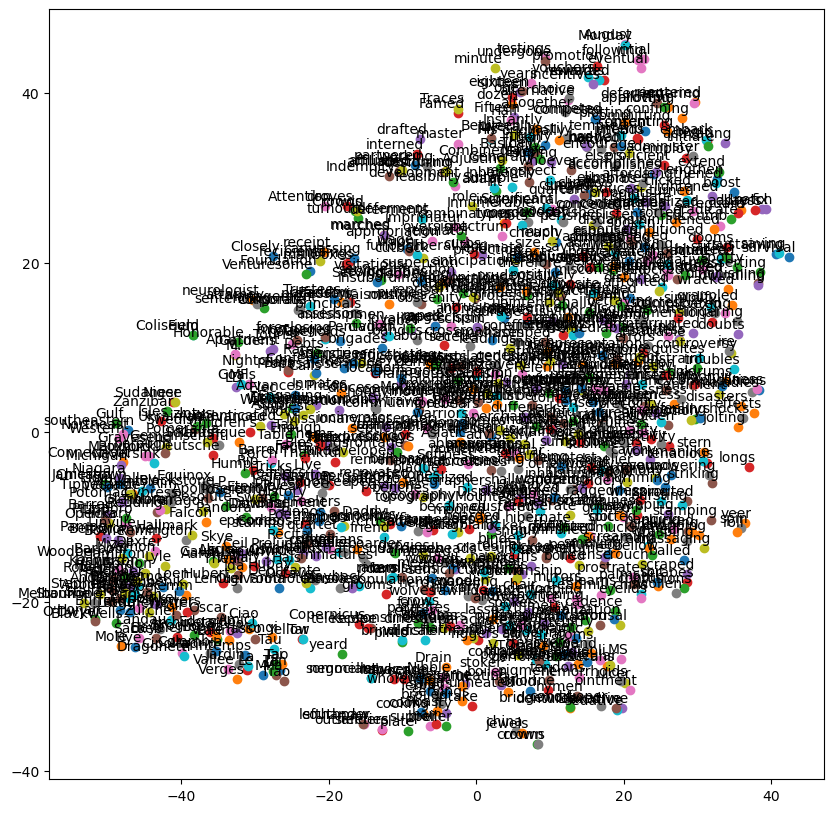

In [25]:
from sklearn.manifold import TSNE
from matplotlib import pylab
import numpy as np

words = []
count = 0
max_count = 1000
embeddings = np.zeros(shape=(max_count,len(w2v_model['university'])))

for term in w2v_model.index_to_key:
    embeddings[count] = w2v_model[term]
    words.append(term)
    count+= 1
    if count >= max_count: break

words_embedded = TSNE(n_components=2).fit_transform(embeddings)

pylab.figure(figsize=(10, 10))
for i, label in enumerate(words):
  x, y = words_embedded[i, :]
  pylab.scatter(x, y)
  pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                 ha='right', va='bottom')
pylab.show()

### Out-of-vocabulary words

Out-of-vocabulary words do not have a valid vector representation in the model

In [35]:
# Get the vector representation of a word
print(w2v_model['uab'])

KeyError: "Key 'uab' not present"

We can add an extra unkknown token to the vocaulary and resort to the representation of this token for words not in the vocabulary

In [ ]:
# Add unknown token and embedding to the model, so that we can use it later when we convert tokens to indices.
unk_tok = '<unk>'
unk_emb = np.random.normal(size=300)
w2v_model.add_vector(unk_tok, unk_emb)
unk_tok_id = w2v_model.key_to_index['<unk>']


Unknown token id:  43981


c:\ProgramData\anaconda3\Lib\site-packages\gensim\models\keyedvectors.py:551: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  warnings.warn(


In [ ]:
# Get the vector representation of a word. Resort to the unknown token if the word is not in the vocabulary of the model.
# key_to_index is a dict that maps each token in the vocabulary to its corresponding index in the vectors matrix of the model. 
# If the token is not in the vocabulary, we use the index of the unknown token.
id_token = w2v_model.key_to_index.get('uab', unk_tok_id)
# vectors is a matrix that contains the vector representation of each token in the vocabulary of the model. 
# The index of each token in the vocabulary corresponds to the index of its vector in the vectors matrix.
print(w2v_model.vectors[id_token])

[-0.04834763  0.064704    0.33698085 -0.9413507  -0.40158626  0.69055146
  0.15720128 -0.70433205  0.04615647 -0.42873824  0.17910859 -1.1018565
  1.7104363  -0.0265276  -1.3944507   0.60384506  0.14922556 -0.20358704
 -1.6493553   0.3349874   0.6684871  -0.09256084  0.5706092  -0.1410881
  0.24644928 -0.14388616 -1.8238049   1.1297661   1.1653016  -1.3906139
  0.50483453  0.00998741  0.2617785  -0.7192209  -2.3910983   0.17470527
  0.89262515  0.7924956  -1.8092843   0.16113034  0.22430111  0.43257368
  1.2709012   1.0985409   0.74882966 -2.223732    1.5529832   0.5542815
  1.0726901  -1.0405897   0.8280326   0.02014063 -1.2275119   0.5446208
 -1.5829155  -0.24003571  0.89551485  0.7144883  -0.6154485   0.5328909
  0.71181715 -0.4735681   0.59177095  1.4375744   0.42472422 -0.75961596
 -0.34478047  1.7717565   2.2984548   1.1627359  -0.05035929  0.9212759
  0.59065527  0.7046195   2.7671657  -0.7688555   1.2774786   0.8147359
  3.033809    0.18815748  1.3256816  -2.9047387   0.7147351

<img src="./note.png" width = "40" height = "40" alt="note" align=top />

## Exercises

1. How can we get a single embedding of a sentence? Write a function that computes a sentence embedding from individual word embeddings. Take into account out-of-vocabulary words

In [ ]:
# ADD YOUR CODE HERE

2. Use the previous function to compute the similarity between the sentences *'I visited England.'* and *'I went to London.'*

In [ ]:
# ADD YOUR CODE HERE

3. Suppose you need to evaluate the following user comments:

    *I purchased a science fiction book last week.*

    *I loved everything related to this fragrance: light, floral and feminine …*

    *I purchased a bottle of wine.*

Write the code to evaluate the similarity of these three sentences to the following keywords: *perfume*, *reading*, *beverages*


In [60]:
# ADD YOUR CODE HERE

4. Using Alexa's review dataset from the file *'amazon_alexa.tsv'*, sort all the reviews in this dataset according to their similarity to the topic *music*

In [ ]:
import pandas as pd
data = pd.read_csv('amazon_alexa.tsv', delimiter = '\t', quoting = 3)

print(data['verified_reviews'])

0                                           Love my Echo!
1                                               Loved it!
2       "Sometimes while playing a game, you can answe...
3       "I have had a lot of fun with this thing. My 4...
4                                                   Music
                              ...                        
3145    "Perfect for kids, adults and everyone in betw...
3146    "Listening to music, searching locations, chec...
3147    "I do love these things, i have them running m...
3148    "Only complaint I have is that the sound quali...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object


In [ ]:
# ADD YOUR CODE HERE